In [1]:
df_bw <- read.csv('data/birthweight_reduced.csv')

In [2]:
head(df_bw)

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
2,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
3,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
4,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
5,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low
6,321,13,19,6.8,37,0,28,0,62,118,39,10,0,67,0,0,Normal


In [3]:
str(df_bw)

'data.frame':	42 obs. of  17 variables:
 $ id              : int  1313 431 808 300 516 321 1363 575 822 1081 ...
 $ headcirumference: int  12 12 13 12 13 13 12 12 13 14 ...
 $ length          : int  17 19 19 18 18 19 19 19 19 21 ...
 $ Birthweight     : num  5.8 4.2 6.4 4.5 5.8 6.8 5.2 6.1 7.5 8 ...
 $ Gestation       : int  33 33 34 35 35 37 37 37 38 38 ...
 $ smoker          : int  0 1 0 1 1 0 1 1 0 0 ...
 $ motherage       : int  24 20 26 41 20 28 20 19 20 18 ...
 $ mnocig          : int  0 7 0 7 35 0 7 7 0 0 ...
 $ mheight         : int  58 63 65 65 67 62 64 65 62 67 ...
 $ mppwt           : int  99 109 140 125 125 118 104 132 103 109 ...
 $ fage            : int  26 20 25 37 23 39 20 20 22 20 ...
 $ fedyrs          : int  16 10 12 14 12 10 10 14 14 12 ...
 $ fnocig          : int  0 35 25 25 50 0 35 0 0 7 ...
 $ fheight         : int  66 71 69 68 73 67 73 72 70 67 ...
 $ lowbwt          : int  1 1 0 1 1 0 1 0 0 0 ...
 $ mage35          : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LowBirthWei

In [4]:
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
#df_bw$fumadora <- factor(df_bw$smoker, labels = c('No','Si'))
df_bw %>% mutate(fumadora=factor(smoker, labels=c('No','Si'))) %>%
    mutate(peso_kg=Birthweight * 0.453592) %>%
    mutate(longitud_cm=length * 2.54) -> df_bw

In [9]:
summary(df_bw)

       id         headcirumference     length       Birthweight    
 Min.   :  27.0   Min.   :12.00    Min.   :17.00   Min.   : 4.200  
 1st Qu.: 537.2   1st Qu.:13.00    1st Qu.:19.00   1st Qu.: 6.450  
 Median : 821.0   Median :13.00    Median :20.00   Median : 7.250  
 Mean   : 894.1   Mean   :13.26    Mean   :19.93   Mean   : 7.264  
 3rd Qu.:1269.5   3rd Qu.:14.00    3rd Qu.:21.00   3rd Qu.: 8.000  
 Max.   :1764.0   Max.   :15.00    Max.   :22.00   Max.   :10.000  
   Gestation         smoker         motherage         mnocig      
 Min.   :33.00   Min.   :0.0000   Min.   :18.00   Min.   : 0.000  
 1st Qu.:38.00   1st Qu.:0.0000   1st Qu.:20.25   1st Qu.: 0.000  
 Median :39.50   Median :1.0000   Median :24.00   Median : 4.500  
 Mean   :39.19   Mean   :0.5238   Mean   :25.55   Mean   : 9.429  
 3rd Qu.:41.00   3rd Qu.:1.0000   3rd Qu.:29.00   3rd Qu.:15.750  
 Max.   :45.00   Max.   :1.0000   Max.   :41.00   Max.   :50.000  
    mheight         mppwt            fage          fedy

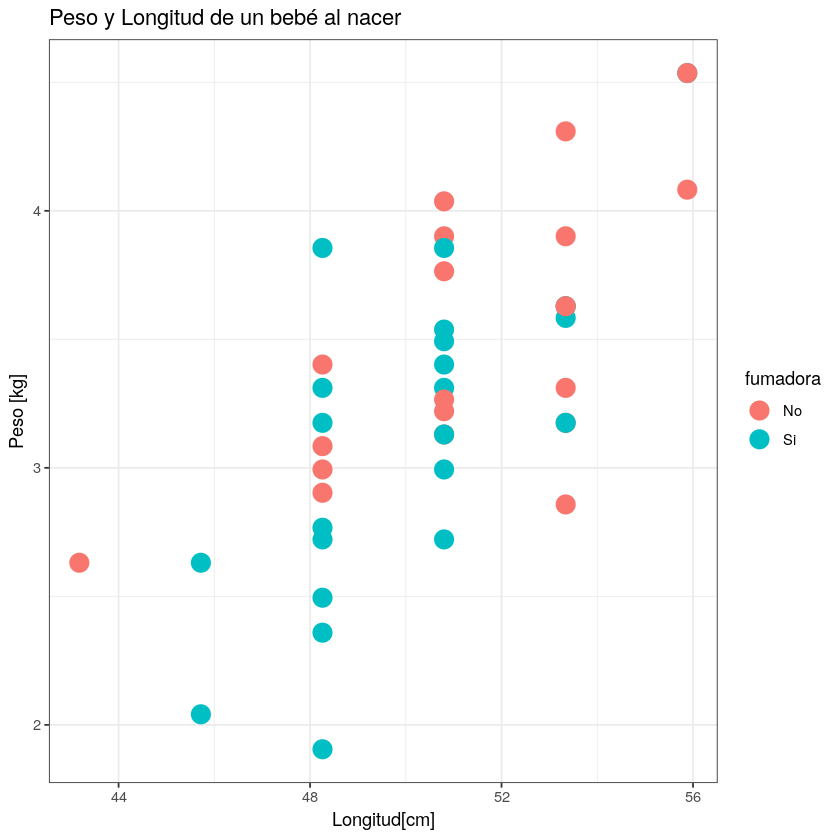

In [20]:
ggplot(df_bw, aes(x=longitud_cm, y=peso_kg, color=fumadora))+
    geom_point(size=5)+
    xlab('Longitud[cm]')+
    ylab('Peso [kg]')+
    ggtitle("Peso y Longitud de un bebé al nacer")+
    theme_bw()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



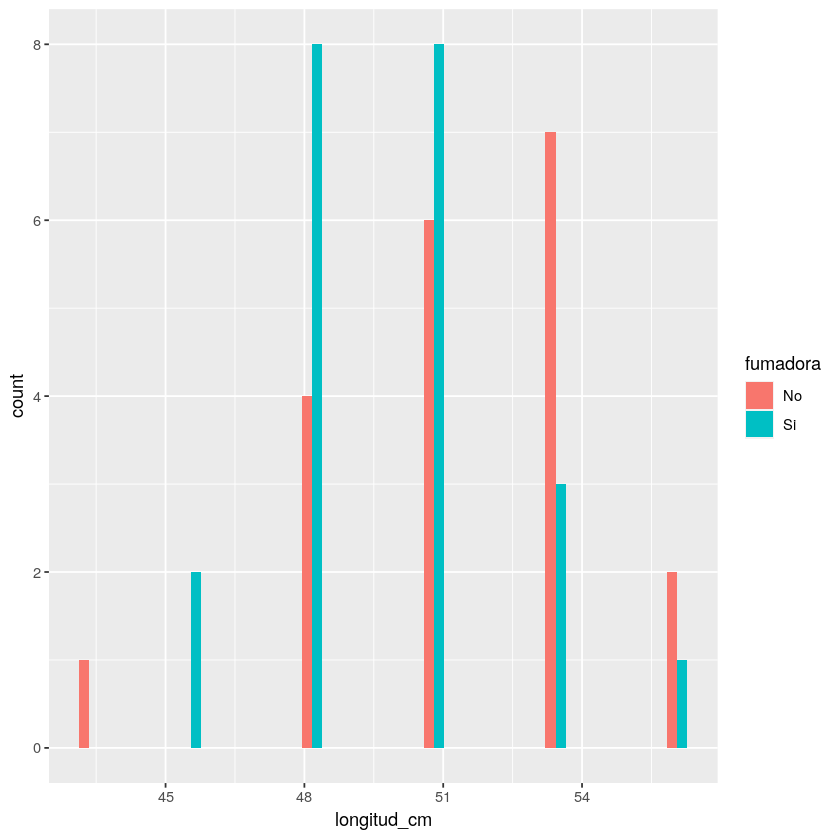

In [24]:
ggplot(df_bw, aes(x=longitud_cm, fill=fumadora))+
geom_histogram(position='dodge')

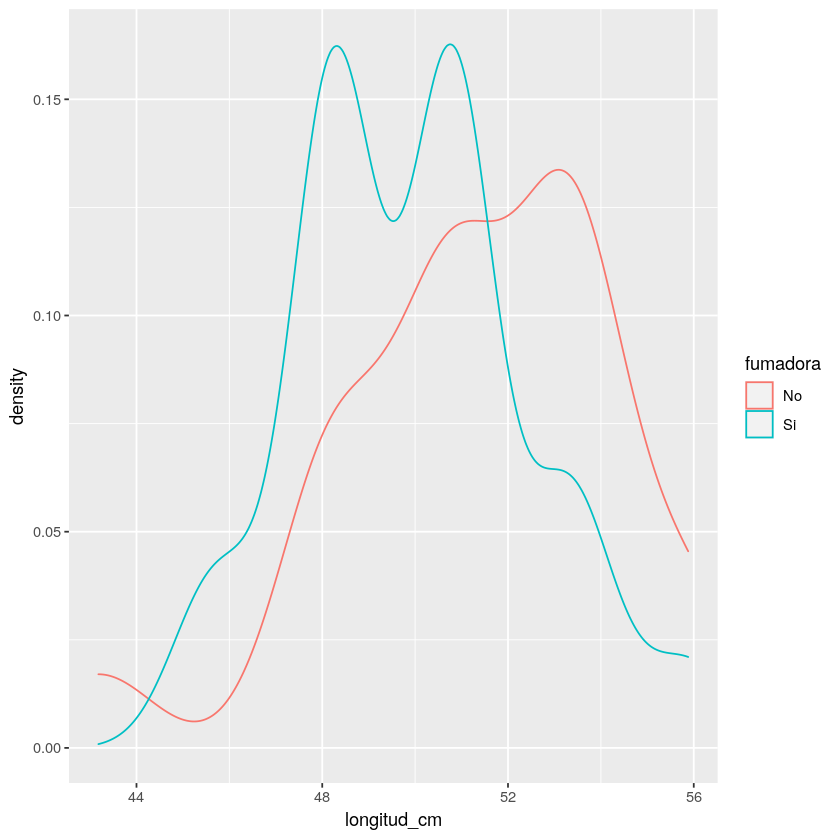

In [26]:
ggplot(df_bw, aes(x=longitud_cm, color=fumadora))+
geom_density()

Probabilidad de que una madre fumadora tenga una longitud inferior a 52 cm

In [34]:
longitud_fumadora <- df_bw[df_bw$fumadora=='Si','longitud_cm']
sum(longitud_fumadora<=52)/length(longitud_fumadora)

[1] 0.8181818

In [44]:
pnorm(52,mean=mean(longitud_fumadora),sd=sd(longitud_fumadora))

[1] 0.7866747

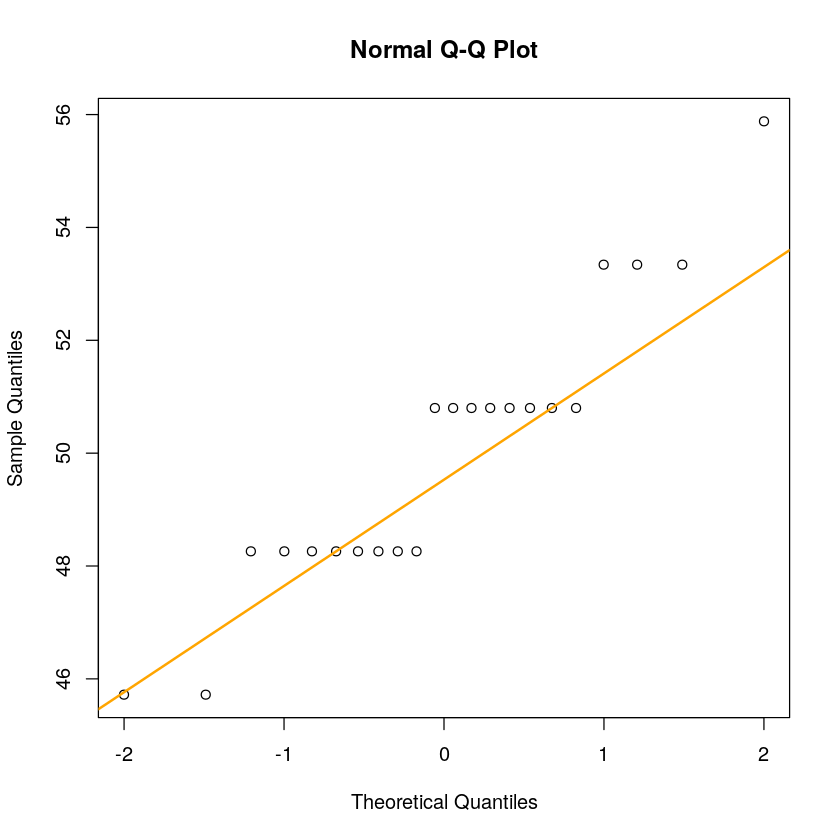

In [53]:
qqnorm(longitud_fumadora)
qqline(longitud_fumadora, col = 'orange', lwd =2)

Probabilidad de que una madre no fumadora tenga una longitud inferior a 52 cm

In [35]:
longitud_no_fumadora <- df_bw[df_bw$fumadora=='No','longitud_cm']
sum(longitud_no_fumadora<=52)/length(longitud_no_fumadora)

[1] 0.55

In [45]:
pnorm(52,mean=mean(longitud_no_fumadora),sd=sd(longitud_no_fumadora))

[1] 0.5900606

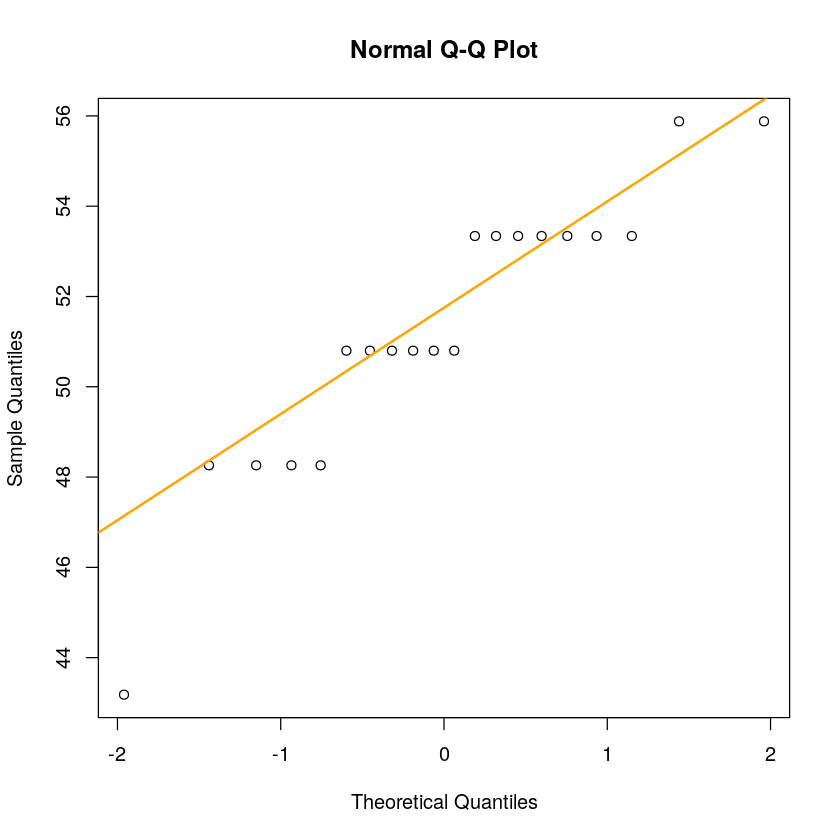

In [52]:
qqnorm(longitud_no_fumadora)
qqline(longitud_no_fumadora, col = 'orange', lwd =2)

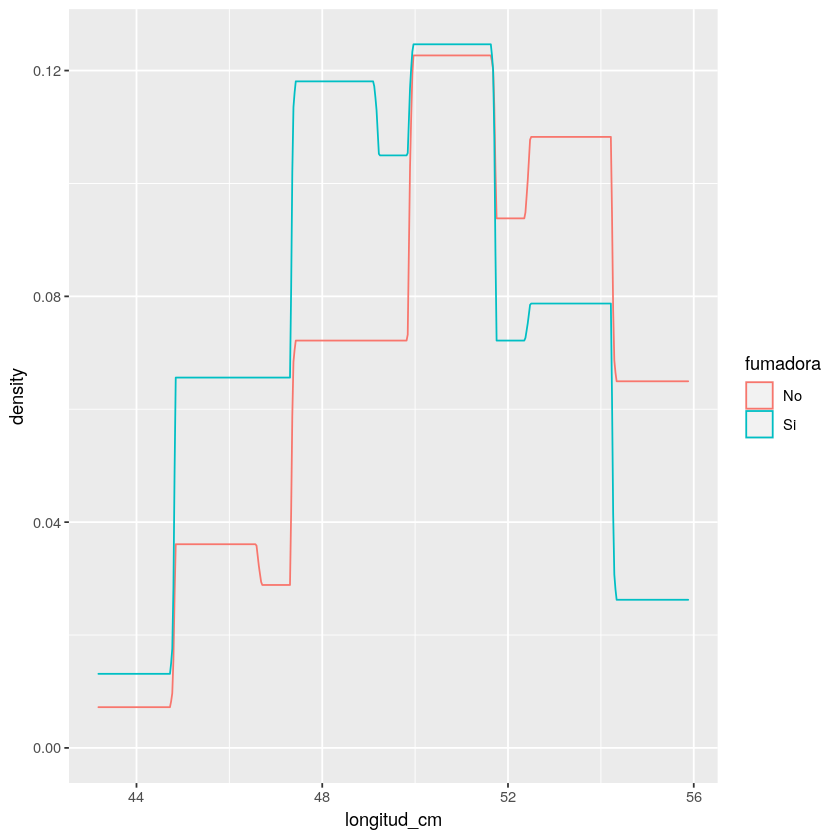

In [39]:
ggplot(df_bw, aes(x=longitud_cm, color=fumadora))+
geom_density(kernel="rectangular", bw=2)

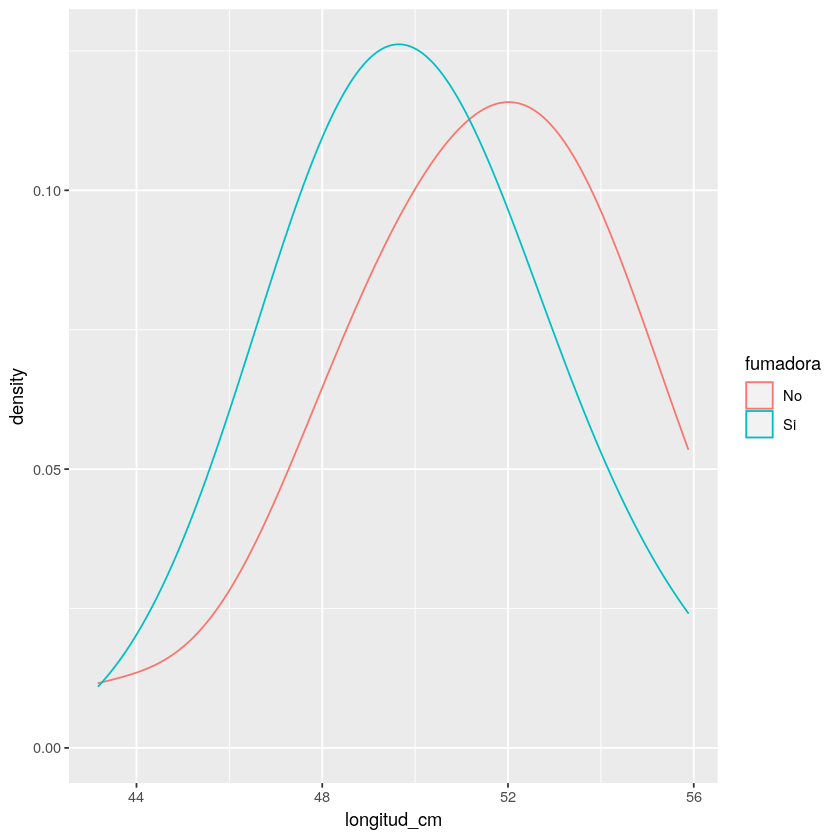

In [40]:
ggplot(df_bw, aes(x=longitud_cm, color=fumadora))+
geom_density(bw=2)

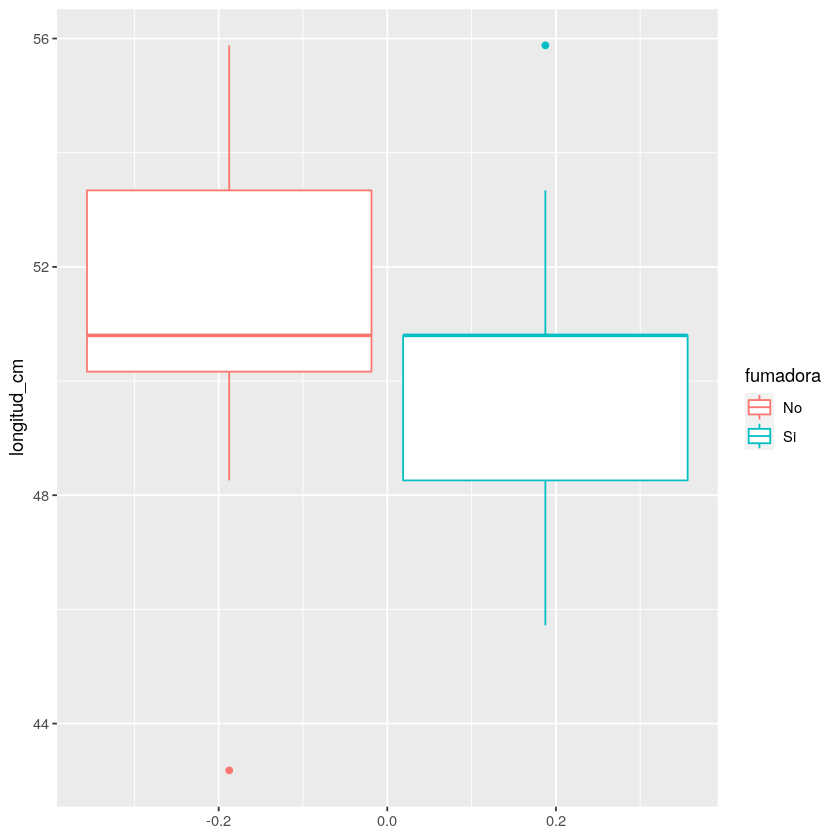

In [42]:
ggplot(df_bw, aes(y=longitud_cm, color=fumadora))+
geom_boxplot()

In [51]:
(df_bw$longitud_cm-mean(df_bw$longitud_cm))/sd(df_bw$longitud_cm)

[1] -2.63134000 -0.83432732 -0.83432732 -1.73283366 -1.73283366 -0.83432732
 [7] -0.83432732 -0.83432732 -0.83432732  0.96268536  0.06417902  0.06417902
[13]  0.06417902 -0.83432732 -0.83432732  0.96268536  0.06417902  0.06417902
[19] -0.83432732  0.06417902 -0.83432732  0.06417902  0.96268536  0.06417902
[25]  0.06417902  0.06417902  0.96268536 -0.83432732  0.96268536  0.06417902
[31]  1.86119170  0.96268536  0.96268536  0.06417902  0.96268536  0.06417902
[37]  1.86119170  0.96268536  0.96268536  1.86119170 -0.83432732  0.06417902